In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
X_pca=pd.read_excel(r"PCA_data.xlsx")
df=pd.read_excel(r'imp_features.xlsx')

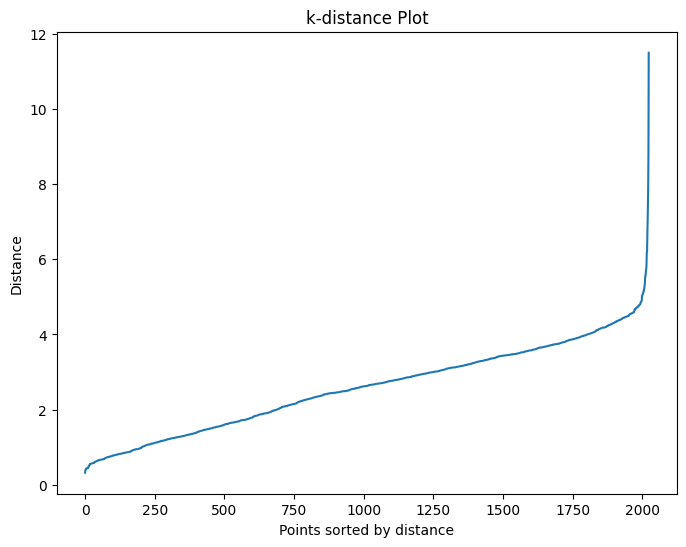

In [3]:
from sklearn.neighbors import NearestNeighbors

# Find the nearest neighbors for each point
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)

# Sort the distances
distances = np.sort(distances[:, -1], axis=0)

# Plot the sorted distances
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('k-distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance')
plt.show()


eps value is 0.01
min_samples value is 3
Only one cluster formed for eps=0.01 and min_samples=3, skipping scores.
eps value is 0.1
min_samples value is 3
Only one cluster formed for eps=0.1 and min_samples=3, skipping scores.
eps value is 0.2
min_samples value is 3
Only one cluster formed for eps=0.2 and min_samples=3, skipping scores.
eps value is 0.3
min_samples value is 3
For eps=0.3, min_samples=3, the average silhouette score is: -0.09156990210866217
For eps=0.3, min_samples=3, the Davies-Bouldin Index is: 1.1440470737676274
For eps=0.3, min_samples=3, the Calinski-Harabasz Index is: 2.319674152144931


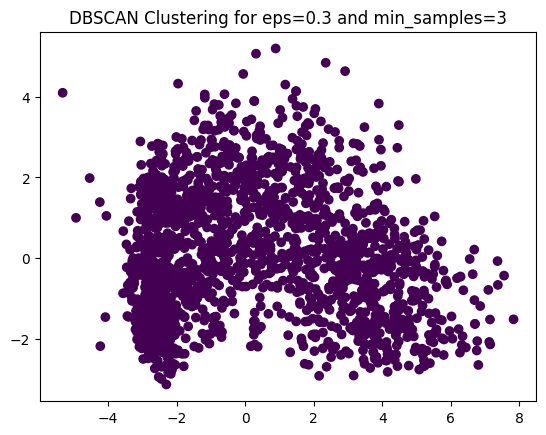

eps value is 0.4
min_samples value is 3
For eps=0.4, min_samples=3, the average silhouette score is: -0.21909966771397335
For eps=0.4, min_samples=3, the Davies-Bouldin Index is: 1.2059561119452586
For eps=0.4, min_samples=3, the Calinski-Harabasz Index is: 2.5354899761450693


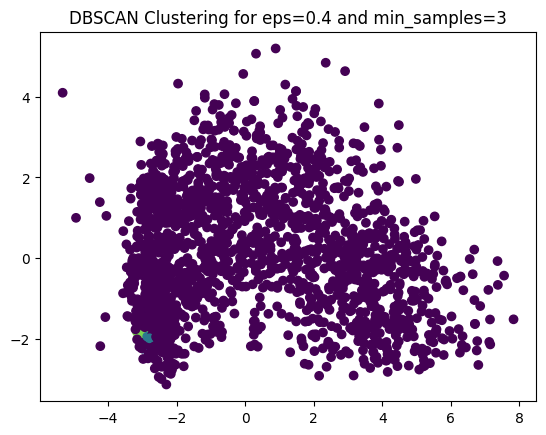

eps value is 0.5
min_samples value is 3
For eps=0.5, min_samples=3, the average silhouette score is: -0.24721603177463827
For eps=0.5, min_samples=3, the Davies-Bouldin Index is: 1.2232031181930334
For eps=0.5, min_samples=3, the Calinski-Harabasz Index is: 2.784921503115965


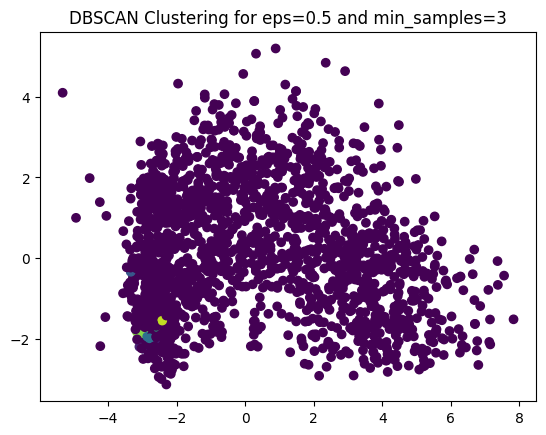

eps value is 0.01
min_samples value is 4
Only one cluster formed for eps=0.01 and min_samples=4, skipping scores.
eps value is 0.1
min_samples value is 4
Only one cluster formed for eps=0.1 and min_samples=4, skipping scores.
eps value is 0.2
min_samples value is 4
Only one cluster formed for eps=0.2 and min_samples=4, skipping scores.
eps value is 0.3
min_samples value is 4
Only one cluster formed for eps=0.3 and min_samples=4, skipping scores.
eps value is 0.4
min_samples value is 4
For eps=0.4, min_samples=4, the average silhouette score is: -0.09098223198771634
For eps=0.4, min_samples=4, the Davies-Bouldin Index is: 1.1560141321612967
For eps=0.4, min_samples=4, the Calinski-Harabasz Index is: 3.081641034129759


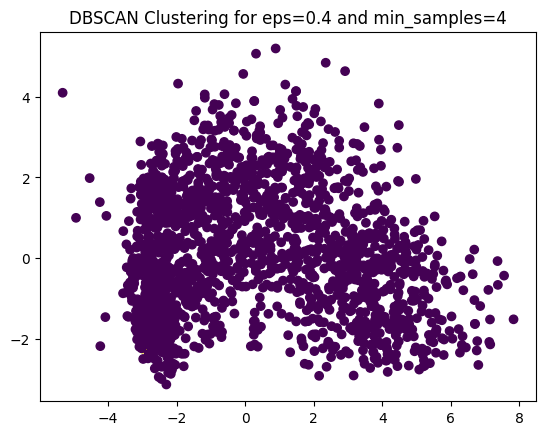

eps value is 0.5
min_samples value is 4
For eps=0.5, min_samples=4, the average silhouette score is: -0.20290020040321347
For eps=0.5, min_samples=4, the Davies-Bouldin Index is: 1.2317468089343582
For eps=0.5, min_samples=4, the Calinski-Harabasz Index is: 3.8605446316667424


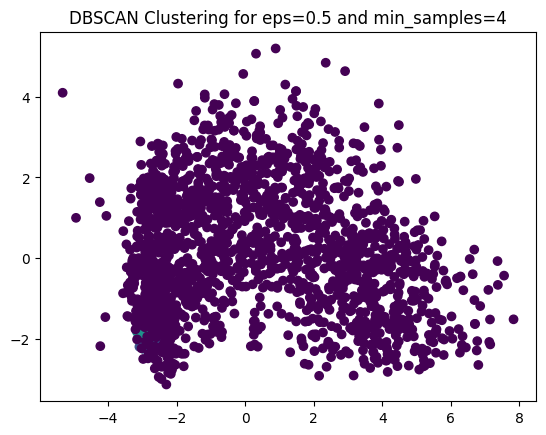

eps value is 0.01
min_samples value is 5
Only one cluster formed for eps=0.01 and min_samples=5, skipping scores.
eps value is 0.1
min_samples value is 5
Only one cluster formed for eps=0.1 and min_samples=5, skipping scores.
eps value is 0.2
min_samples value is 5
Only one cluster formed for eps=0.2 and min_samples=5, skipping scores.
eps value is 0.3
min_samples value is 5
Only one cluster formed for eps=0.3 and min_samples=5, skipping scores.
eps value is 0.4
min_samples value is 5
Only one cluster formed for eps=0.4 and min_samples=5, skipping scores.
eps value is 0.5
min_samples value is 5
For eps=0.5, min_samples=5, the average silhouette score is: -0.09443869639169929
For eps=0.5, min_samples=5, the Davies-Bouldin Index is: 1.20798387529537
For eps=0.5, min_samples=5, the Calinski-Harabasz Index is: 5.954721141070925


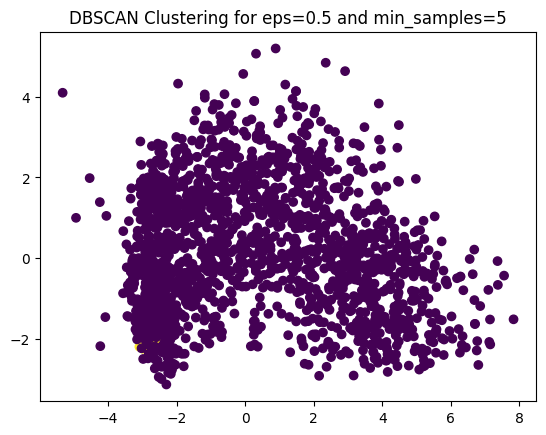

eps value is 0.01
min_samples value is 8
Only one cluster formed for eps=0.01 and min_samples=8, skipping scores.
eps value is 0.1
min_samples value is 8
Only one cluster formed for eps=0.1 and min_samples=8, skipping scores.
eps value is 0.2
min_samples value is 8
Only one cluster formed for eps=0.2 and min_samples=8, skipping scores.
eps value is 0.3
min_samples value is 8
Only one cluster formed for eps=0.3 and min_samples=8, skipping scores.
eps value is 0.4
min_samples value is 8
Only one cluster formed for eps=0.4 and min_samples=8, skipping scores.
eps value is 0.5
min_samples value is 8
Only one cluster formed for eps=0.5 and min_samples=8, skipping scores.
eps value is 0.01
min_samples value is 10
Only one cluster formed for eps=0.01 and min_samples=10, skipping scores.
eps value is 0.1
min_samples value is 10
Only one cluster formed for eps=0.1 and min_samples=10, skipping scores.
eps value is 0.2
min_samples value is 10
Only one cluster formed for eps=0.2 and min_samples=10,

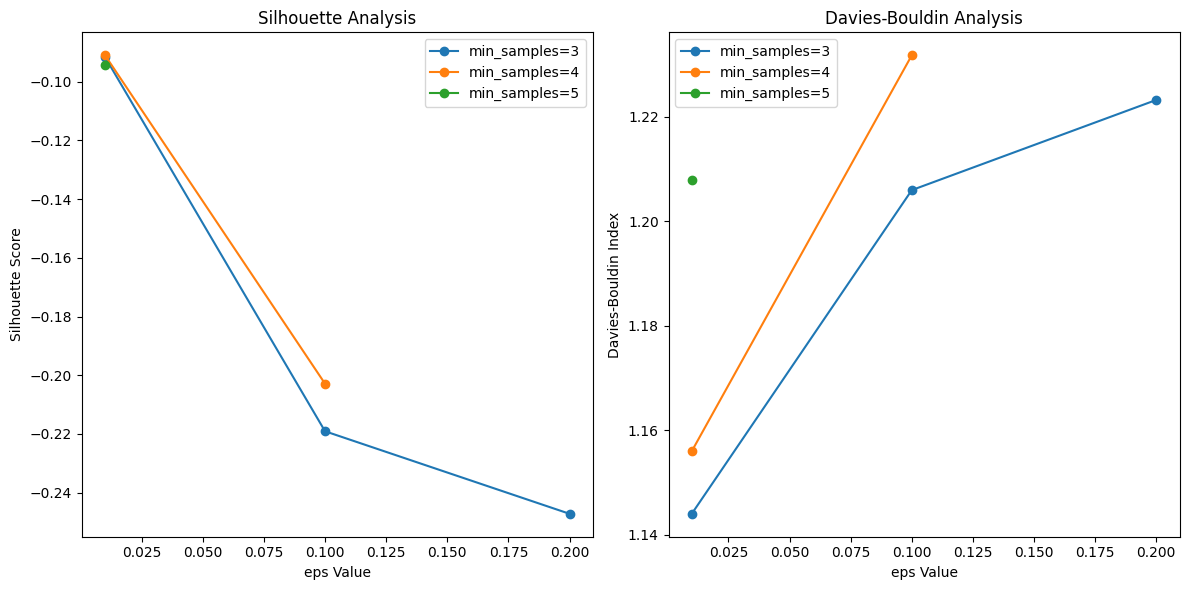

In [4]:

# Range of parameters
range_eps = [0.01,0.1, 0.2, 0.3, 0.4, 0.5]
range_min = [3,4,5,8,10,15,20]

# Initialize dictionaries to store the results
silhouette_scores = {j: [] for j in range_min}  # Initialize empty lists for each min_samples value
davies_bouldin_scores = {j: [] for j in range_min}
calinski_harabasz_scores = {j: [] for j in range_min}

for j in range_min:
    for i in range_eps:
        print("eps value is " + str(i))
        
        print("min_samples value is " + str(j))

        # Apply DBSCAN clustering
        db = DBSCAN(eps=i, min_samples=j).fit(X_pca)
        labels = db.labels_

        # Check for single-cluster scenario (noise points are labeled as -1)
        if len(set(labels)) > 1:  # More than one cluster (excluding noise)
            silhouette_avg = silhouette_score(X_pca, labels)
            db_index = davies_bouldin_score(X_pca, labels)
            ch_index = calinski_harabasz_score(X_pca, labels)

            # Append the scores for each min_samples value
            silhouette_scores[j].append(silhouette_avg)
            davies_bouldin_scores[j].append(db_index)
            calinski_harabasz_scores[j].append(ch_index)

            print(f"For eps={i}, min_samples={j}, the average silhouette score is: {silhouette_avg}")
            print(f"For eps={i}, min_samples={j}, the Davies-Bouldin Index is: {db_index}")
            print(f"For eps={i}, min_samples={j}, the Calinski-Harabasz Index is: {ch_index}")

            # Visualize the clusters (optional)
            plt.scatter(X_pca[0], X_pca[1], c=labels)
            plt.title(f"DBSCAN Clustering for eps={i} and min_samples={j}")
            plt.show()
        else:
            print(f"Only one cluster formed for eps={i} and min_samples={j}, skipping scores.")

# Plot Silhouette Scores for each min_samples value
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for j in range_min:
    if silhouette_scores[j]:  # Only plot if there are results for this min_samples value
        plt.plot(range_eps[:len(silhouette_scores[j])], silhouette_scores[j], marker='o', label=f'min_samples={j}')
plt.title('Silhouette Analysis')
plt.xlabel('eps Value')
plt.ylabel('Silhouette Score')
plt.legend()

# Plot Davies-Bouldin Index for each min_samples value
plt.subplot(1, 2, 2)
for j in range_min:
    if davies_bouldin_scores[j]:  # Only plot if there are results for this min_samples value
        plt.plot(range_eps[:len(davies_bouldin_scores[j])], davies_bouldin_scores[j], marker='o', label=f'min_samples={j}')
plt.title('Davies-Bouldin Analysis')
plt.xlabel('eps Value')
plt.ylabel('Davies-Bouldin Index')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
# Apply DBSCAN with chosen eps and min_samples
dbscan = DBSCAN(eps=0.4, min_samples=5)  # Adjust eps and min_samples based on your data
dbscan_df=df
dbscan_df['DBSCAN_Cluster'] = dbscan.fit_predict(X_pca)

# The DBSCAN fit_predict method assigns -1 to noise points and non-negative integers to clusters
print(dbscan_df[['Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'DBSCAN_Cluster']].head())

   Income  Wines  Fruits  Meat  Fish  Sweet  Gold  DBSCAN_Cluster
0   58138    635      88   546   172     88    88              -1
1   46344     11       1     6     2      1     6              -1
2   71613    426      49   127   111     21    42              -1
3   26646     11       4    20    10      3     5              -1
4   58293    173      43   118    46     27    15              -1


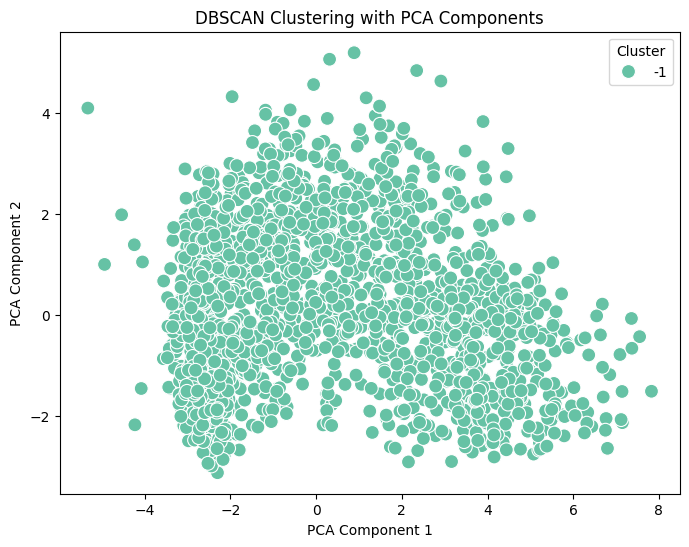

In [6]:
# Visualize the DBSCAN clusters in the PCA space
plt.figure(figsize=(8, 6))

# Scatter plot: Points labeled by their cluster assignment
sns.scatterplot(x=X_pca[0], y=X_pca[1], hue=df['DBSCAN_Cluster'], palette='Set2', s=100)

plt.title('DBSCAN Clustering with PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

In [7]:
# Evaluate clustering quality
silhouette_avg = silhouette_score(X_pca, dbscan_df['DBSCAN_Cluster'])
db_index = davies_bouldin_score(X_pca, dbscan_df['DBSCAN_Cluster'])
ch_index = calinski_harabasz_score(X_pca, dbscan_df['DBSCAN_Cluster'])
print(f"The average silhouette score for GMM is: {silhouette_avg}")
print(f"The Davies-Bouldin Index for GMM is: {db_index}")
print(f"The Calinski-Harabasz Index for GMM is: {ch_index}")

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)